# 读取Dataset数据集

In [45]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
ibc_parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(ibc_parent_dir)

from ibc import dataset
from scipy.spatial import ConvexHull

**加载数据**

In [46]:
train_dataset_config = dataset.DatasetConfig(
    dataset_size=10,
    seed=42, 
    # 其他参数默认
)
train_dataset = dataset.CoordinateRegression(train_dataset_config)  # data: coordinate regression shape:（N,2)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=1,
    pin_memory=torch.cuda.is_available(),
)

**打印数据类型**

In [47]:
batch = next(iter(train_dataloader))

print("batch的类型:", type(batch))  # data + label
print("batch包含的元素数量:", len(batch))

for i in range(len(batch)):
    print("batch[{}].shape:{}".format(i, batch[i].shape))
print(batch[1])

batch的类型: <class 'list'>
batch包含的元素数量: 2
batch[0].shape:torch.Size([8, 3, 96, 96])
batch[1].shape:torch.Size([8, 2])
tensor([[ 0.0737,  0.8316],
        [ 0.4947, -0.5579],
        [ 0.5579, -0.2211],
        [ 0.5579, -0.9368],
        [ 0.7263,  0.8316],
        [-0.7053, -0.9368],
        [ 0.8105, -0.3895],
        [-0.5789, -0.9368]])


**plot dataset**

tensor([ 0.5579, -0.2211])


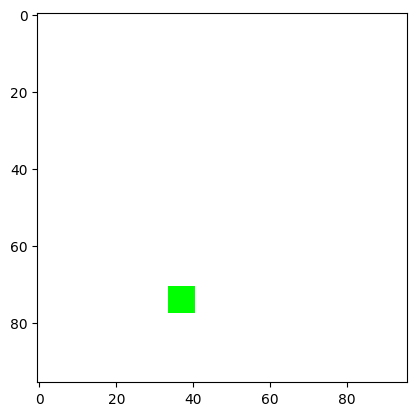

In [53]:
# Visualize one instance.
image, target = train_dataset[np.random.randint(len(train_dataset))]
print(target)
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

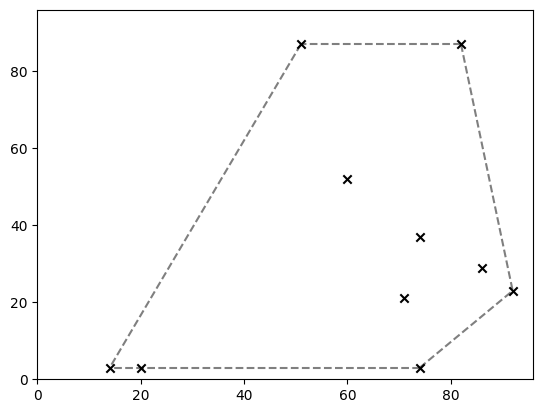

In [49]:
# Plot target distribution and convex hull.
targets = train_dataset.coordinates
plt.scatter(targets[:, 0], targets[:, 1], marker="x", c="black")
for simplex in ConvexHull(targets).simplices:
    plt.plot(
        targets[simplex, 0],
        targets[simplex, 1],
        "--",
        zorder=2,
        alpha=0.5,
        c="black",
    )
plt.xlim(0, train_dataset.resolution[1])
plt.ylim(0, train_dataset.resolution[0])
plt.show()